## Fashion Recommender EDA
This notebook explores some of the data in the Fashion Dataset and includes some basic functions for accessing the data.

In [46]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import json
import numpy as np
from collections import Counter
from PIL import Image

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# !pip install ipywidgets 
# !jupyter nbextension enable --py widgetsnbextension
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

# %%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [48]:
data_folder = './data/FashionDataSet/'
train_dir = os.path.join(data_folder, 'train')
test_dir = os.path.join(data_folder, 'test')
for file in os.listdir(data_folder):
    if file[0] != '.':
        print(file)

fashion_dictionary.json
label_descriptions.json
libraries
sample_submission.csv
test
train
train.csv
weghts
fashion_dataset.pkl


#### Folders '`train`' and '`test`' should be in this listing as well as the files:

- `label_descriptions.json` <br>
- `train.csv` <br>
- `sample_submissions.csv` <br>

## Support Functions

In [49]:
def classid2label(class_id):
    """Will lookup the class id from the train.csv file and convert
    it to the respective cateogry number and corresponding attributes values."""
    category, *attribute = class_id.split("_")
    return category, attribute


In [50]:
def print_dict(dictionary, name_dict):
    """
    EDA function to display the categories and attributes
    """
    print("{}{}{}{}{}".format("rank".ljust(5), "id".center(8), "name".center(40), "amount".rjust(10), "ratio(%)".rjust(10)))
    all_num = sum(dictionary.values())
    for i, (key, val) in enumerate(sorted(dictionary.items(), key=lambda x: -x[1])):
        print("{:<5}{:^8}{:^40}{:>10}{:>10.3%}".format(i+1, key, name_dict[key], val, val/all_num))
        

In [51]:
def print_img_with_labels(img_name, labels, df_categories, df_attributes, ax):
    """
    Support function for print_image().
    Displays a single image with its respective categories and attributes 
    for each identified element of cloting in the image.
    """
    img = np.asarray(Image.open(os.path.join(data_folder, 'train', img_name)))
    label_interval = (img.shape[0] * 0.9) / len(labels)
    ax.imshow(img)
    
    for l in labels:
        cat, attrs = classid2label(l)
        print("Category: {}".format(category_name_dict[cat]))
        if len(attrs) > 0:
            for a in attrs:
                print("\tAttribute: ", end="")
                print("  {}  ".format(attribute_name_dict[a]), end="")
                print()
        
#     for num, attribute_id in enumerate(labels):
#         x_pos = img.shape[1] * 1.1
#         y_pos = (img.shape[0] * 0.9) / len(labels) * (num + 2) + (img.shape[0] * 0.1)
#         if(num == 0):
#             ax.text(x_pos, y_pos-label_interval*2, "category", fontsize=12)
#             ax.text(x_pos, y_pos-label_interval, category_name_dict[attribute_id], fontsize=12)
#             if(len(labels) > 1):
#                 ax.text(x_pos, y_pos, "attribute", fontsize=12)
#         else:
#             ax.text(x_pos, y_pos, attribute_name_dict[attribute_id], fontsize=12)            

In [52]:
def print_img(img_name, ax):
    """
    Called to display an image with its cateogries and attributes
    """
    img_df = df_traininfo[df_traininfo.ImageId == img_name]
    labels = list(set(img_df["ClassId"].values))
    
    print_img_with_labels(img_name, labels, df_categories, df_attributes, ax)
    

In [53]:
def json2df(data):
    """
    Converts a json record into a dataframe.
    """
    df = pd.DataFrame()
    for index, el in enumerate(data):
        for key, val in el.items():
            df.loc[index, key] = val
    return df


## END Support Functions

### Explore Label_Descriptions
Label descriptions join catgory and attribute id values to their descrriptions.

**`Category`** - Clothing type (shirt, jacket, pants,...) <br>
**`Attribute`** - Characteristics (fit, fabric, details,...)

In [54]:
labels_path = os.path.join(data_folder, 'label_descriptions.json' )


In [55]:
# read labels file
with open(labels_path, 'r') as myfile:
    data=myfile.read()

# parse file
labels = json.loads(data)

In [56]:
labels.keys()

dict_keys(['info', 'categories', 'attributes'])

In [57]:
labels.get('info')

{'year': 2019,
 'version': '1.0',
 'description': 'The 2019 FGVC^6 iMaterialist Competition - Fashion track dataset.',
 'contributor': 'iMaterialist Fashion Competition group',
 'url': 'https://github.com/visipedia/imat_comp',
 'date_created': '2019-04-19 12:38:27.493919'}

In [107]:
categories = labels.get('categories')
df_categories = pd.DataFrame(categories)
print("{} cateogries".format(len(df_categories)))
display(df_categories)

46 cateogries


,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


In [59]:
np.unique(df_categories.supercategory)

array(['arms and hands', 'closures', 'decorations', 'garment parts',
       'head', 'legs and feet', 'lowerbody', 'neck', 'others',
       'upperbody', 'waist', 'wholebody'], dtype=object)

In [60]:
np.unique(df_categories.level)

array([2])

In [61]:
attributes = labels.get('attributes')
df_attributes = pd.DataFrame(attributes)
print("{} attributes".format(len(df_attributes)))
display(df_attributes.head())

92 attributes


,id,name,supercategory,level
0,0,above-the-hip (length),length,1
1,1,hip (length),length,1
2,2,micro (length),length,1
3,3,mini (length),length,1
4,4,above-the-knee (length),length,1


In [62]:
np.unique(df_attributes.supercategory)

array(['animal', 'length', 'opening type', 'silhouette',
       'textile finishing, manufacturing techniques', 'textile pattern',
       'waistline'], dtype=object)

In [63]:
np.unique(df_attributes.level)

array([1, 2])

### Explore Train CSV

Train CSV file contains listing of images in training set:

**`ImageId`** - filename of the image <br>
**`EncodedPixels`** - space separated integers in pairs of 'pixel loc' 'run'.  Identifies mask.  **run-length encoded format**<br>
**`Height`** - Image height <br>
**`Width`** - Image width <br>
**`ClassId`** - Cateogry/ies of items masked in image. _ delimited.  First item is 'category'.  Subsequent items are attributes.

In [64]:
traininfo_path = os.path.join(data_folder, 'train.csv' )


In [65]:
# read train.csv file
df_traininfo = pd.read_csv(traininfo_path)

In [66]:
len(df_traininfo)

333415

In [67]:
df_traininfo.columns

Index(['ImageId', 'EncodedPixels', 'Height', 'Width', 'ClassId'], dtype='object')

In [68]:
df_traininfo.iloc[40:45]

,ImageId,EncodedPixels,Height,Width,ClassId
40,000775b6b5e27b011dc8bba2d7b85211.jpg,309670 11 311259 33 312849 54 314441 71 316034...,1600,1067,31
41,000775b6b5e27b011dc8bba2d7b85211.jpg,663032 1 664631 2 666229 3 667828 4 669426 6 6...,1600,1067,31
42,000aac3870ea7c59ca0333ffa5327323.jpg,8971124 17 8975101 49 8979077 82 8983053 116 8...,4000,6000,10_3_20_34_56_69_91
43,000aac3870ea7c59ca0333ffa5327323.jpg,10565221 1 10569218 5 10573216 8 10577213 11 1...,4000,6000,33
44,000aac3870ea7c59ca0333ffa5327323.jpg,8621972 2 8625970 5 8629968 9 8633966 13 86379...,4000,6000,3_1_10_20_41_60_61_91


In [69]:
df_categories[df_categories.id==10].name.values[0]

'dress'

In [70]:
# User Support Funtion to parse ClassId
classid, attributes = classid2label(df_traininfo.iloc[42].ClassId)

# display results
print("ClassID: {}:{}".format(classid, df_categories[df_categories.id==int(classid)].name.values[0]))
print("Attributes:")
for a in attributes:
      print("\t{}:{}".format(a,df_attributes[df_attributes.id==int(a)].name.values[0]))
    

ClassID: 10:dress
Attributes:
	3:mini (length)
	20:symmetrical
	34:a-line
	56:cutout
	69:floral
	91:no waistline


### Analyze Categories

In [71]:
counter_category = Counter()
counter_attribute = Counter()
for class_id in df_traininfo["ClassId"]:
    category, attribute = classid2label(class_id)
    counter_category.update([category])
    counter_attribute.update(attribute)

In [72]:
category_name_dict = {}
for i in labels["categories"]:
    category_name_dict[str(i["id"])] = i["name"]
attribute_name_dict = {}
for i in labels["attributes"]:
    attribute_name_dict[str(i["id"])] = i["name"]

In [73]:
print("Category label frequency")
print_dict(counter_category, category_name_dict)

Category label frequency
rank    id                     name                      amount  ratio(%)
1       31                    sleeve                      59452   17.831%
2       23                     shoe                       46374   13.909%
3       33                   neckline                     34260   10.275%
4       32                    pocket                      27179    8.152%
5       10                    dress                       18739    5.620%
6       1            top, t-shirt, sweatshirt             16550    4.964%
7       6                     pants                       12415    3.724%
8       28                    collar                      10160    3.047%
9       35                    zipper                       7994    2.398%
10      4                     jacket                       7833    2.349%
11      24                 bag, wallet                     7217    2.165%
12      19                     belt                        6851    2.055%
13      0    

### Review Images

In [74]:
print("The number of training image is {}.".format( len(os.listdir(os.path.join(data_folder, 'train'))) ))
print("The number of test image is {}.".format( len(os.listdir(os.path.join(data_folder, 'test'))) ) )

The number of training image is 91254.
The number of test image is 6402.


In [75]:
len(os.listdir(os.path.join(data_folder, 'test')))

6402

In [76]:
df_traininfo.head()

,ImageId,EncodedPixels,Height,Width,ClassId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32


In [77]:
df_traininfo[df_traininfo.ImageId=='a4e507a1e642da9bed9864dd8c504fab.jpg']

,ImageId,EncodedPixels,Height,Width,ClassId
214341,a4e507a1e642da9bed9864dd8c504fab.jpg,2695394 2 2698937 3 2702480 4 2706024 4 270956...,3543,2362,6
214342,a4e507a1e642da9bed9864dd8c504fab.jpg,2939834 9 2943377 9 2946921 9 2950464 9 295400...,3543,2362,32
214343,a4e507a1e642da9bed9864dd8c504fab.jpg,5720952 2 5724495 3 5728037 5 5731579 8 573512...,3543,2362,32
214344,a4e507a1e642da9bed9864dd8c504fab.jpg,2146002 11 2149542 33 2153082 47 2156621 53 21...,3543,2362,0
214345,a4e507a1e642da9bed9864dd8c504fab.jpg,5986525 1 5990065 4 5993605 7 5997145 10 60006...,3543,2362,31
214346,a4e507a1e642da9bed9864dd8c504fab.jpg,2146002 11 2149542 33 2153082 47 2156621 53 21...,3543,2362,31
214347,a4e507a1e642da9bed9864dd8c504fab.jpg,3019686 7 3023226 20 3026766 33 3030305 47 303...,3543,2362,28
214348,a4e507a1e642da9bed9864dd8c504fab.jpg,1883691 4 1887232 11 1890772 19 1894313 24 189...,3543,2362,1
214349,a4e507a1e642da9bed9864dd8c504fab.jpg,6117303 14 6120846 41 6124388 69 6127931 96 61...,3543,2362,31
214350,a4e507a1e642da9bed9864dd8c504fab.jpg,1883691 4 1887232 11 1890772 19 1894313 24 189...,3543,2362,31


In [78]:
i = 82
df_traininfo.iloc[i][['Height', 'Width']]

Height    1200
Width      900
Name: 82, dtype: object

image is 000e147149bf33c584afaa953bc198ed.jpg,
(H, W) = (1200, 900)
Category: dress
Category: neckline
Category: headband, head covering, hair accessory
Category: bead


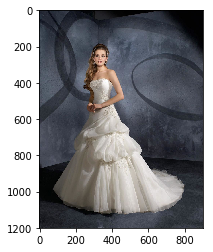

In [79]:

img_name = df_traininfo.iloc[i].ImageId
height, width = df_traininfo.iloc[i][['Height', 'Width']]
print("image is {},\n(H, W) = ({}, {})".format(img_name, height, width))
fig, ax = plt.subplots()
print_img(img_name, ax)

In [80]:
pallete =  [
    'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
    'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']


def make_mask_img(segment_df):
    category_num = len(counter_category)
    seg_width = segment_df.at[0, "Width"]
    seg_height = segment_df.at[0, "Height"]
    seg_img = np.full(seg_width*seg_height, category_num-1, dtype=np.uint8)
    for encoded_pixels, class_id in zip(segment_df["EncodedPixels"].values, segment_df["ClassId"].values):
        pixel_list = list(map(int, encoded_pixels.split(" ")))
        for i in range(0, len(pixel_list), 2):
            start_index = pixel_list[i] - 1
            index_len = pixel_list[i+1] - 1
            seg_img[start_index:start_index+index_len] =\
                int(int(class_id.split("_")[0]) / (category_num-1) * 255)
    seg_img = seg_img.reshape((seg_height, seg_width), order='F')
    return seg_img


def train_generator(df, batch_size):
    img_ind_num = df.groupby("ImageId")["ClassId"].count()
    index = df.index.values[0]
    trn_images = []
    seg_images = []
    for i, (img_name, ind_num) in enumerate(img_ind_num.items()):
        img = cv2.imread(os.path.join(train_dir, img_name))
        segment_df = (df.loc[index:index+ind_num-1, :]).reset_index(drop=True)
        index += ind_num
        if segment_df["ImageId"].nunique() != 1:
            raise Exception("Index Range Error")
        seg_img = make_mask_img(segment_df)
        
        # HWC -> CHW
        img = img.transpose((2, 0, 1))
        
        trn_images.append(img)
        seg_images.append(seg_img)
        if((i+1) % batch_size == 0):
            return trn_images, seg_images

In [83]:

img_tmp = os.path.join(train_dir,'a4e507a1e642da9bed9864dd8c504fab.jpg')
img_tmp

'./data/FashionDataSet/train/a4e507a1e642da9bed9864dd8c504fab.jpg'

In [108]:
df_traininfo.columns

Index(['ImageId', 'EncodedPixels', 'Height', 'Width', 'ClassId'], dtype='object')

In [118]:
index = df_traininfo[df_traininfo.ImageId=='a4e507a1e642da9bed9864dd8c504fab.jpg']
index = index[index.ClassId=='4'].index.values
index

array([214352])

In [119]:
segment_df = (df_traininfo.loc[index[0]:index[-1]+1, :]).reset_index(drop=True)
seg_img = make_mask_img(segment_df)

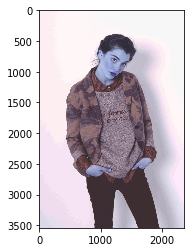

In [120]:
tmp = cv2.imread(img_tmp)
plt.imshow(tmp)

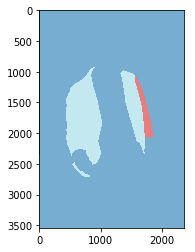

In [123]:
fig, ax = plt.subplots()
ax.imshow(cv2plt(tmp))
seg_img[seg_img == 45] = 255
ax.imshow(seg_img, cmap='tab20_r', alpha=0.6)

In [85]:
def cv2plt(img, isColor=True):
    original_img = img
    original_img = original_img.transpose(1, 2, 0)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    return original_img

In [89]:
cv2plt(tmp).shape

(2362, 3, 3)

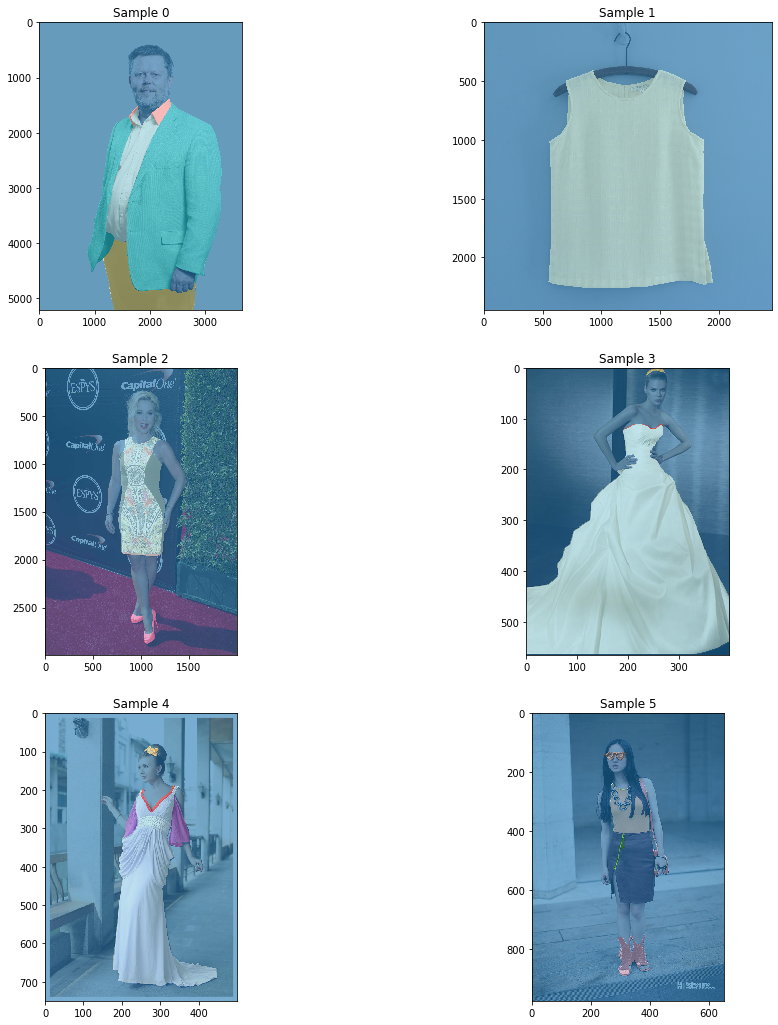

In [162]:
original, segmented = train_generator(df_traininfo, 6)
fig, ax = plt.subplots(3, 2, figsize=(16, 18))
for i, (img, seg) in enumerate(zip(original, segmented)):
    ax[i//2, i%2].imshow(cv2plt(img))
    seg[seg == 45] = 255
    ax[i//2, i%2].imshow(seg, cmap='tab20_r', alpha=0.6)
    ax[i//2, i%2].set_title("Sample {}".format(i))

### Pixel Encodings for Masking

In [30]:
pixels = df_traininfo.iloc[0].EncodedPixels

In [31]:
p = pixels.split(" ")

In [32]:
np.array(p)

array(['6068157', '7', '6073371', ..., '20', '14807263', '7'], dtype='<U8')

In [60]:
# get odd indexes
n = len(p)
n, n/2

(3354, 1677.0)

In [76]:
pixel_idx = np.arange(0, n, 2)
run_idx = np.arange(1, n, 2)

In [97]:
ind = np.array([1,3,5], dtype=int)
p[ind]

NameError: name 'intp' is not defined